In [124]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import ast
from collections import Counter


In [2]:
df_interactions_train=pd.read_csv('/Users/ramzi/Projet_Kit_Big_Data/data/interactions_test.csv')
df_pp_recipes=pd.read_csv('/Users/ramzi/Projet_Kit_Big_Data/data/PP_recipes.csv')
df_pp_users=pd.read_csv('/Users/ramzi/Projet_Kit_Big_Data/data/PP_users.csv')
df_RAW_interactions=pd.read_csv('/Users/ramzi/Projet_Kit_Big_Data/data/RAW_interactions.csv')
df_RAW_recipes=pd.read_csv('/Users/ramzi/Projet_Kit_Big_Data/data/RAW_recipes.csv')


In [3]:
df_pp_recipes.head()

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [13]:
df_pp_recipes[df_pp_recipes.id == 137739 ].ingredient_ids

21993    [7933, 4694, 4795, 3723, 840, 5006, 6270]
Name: ingredient_ids, dtype: object

In [15]:
df_RAW_recipes[df_RAW_recipes.id == 137739].ingredients.values

array(["['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']"],
      dtype=object)

In [4]:
df_pp_users.head()

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


In [5]:
df_RAW_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [6]:
df_interactions_train

,user_id,recipe_id,date,rating,u,i
0,8937,44551,2005-12-23,4.0,2,173538
1,56680,126118,2006-10-07,4.0,16,177847
2,349752,219596,2008-04-12,0.0,26,89896
3,628951,82783,2007-11-13,2.0,45,172637
4,92816,435013,2013-07-31,3.0,52,177935
...,...,...,...,...,...,...
12450,101053,179011,2009-01-03,5.0,25054,130258
12451,252205,81398,2005-12-26,2.0,25055,152255
12452,624305,142984,2011-01-15,1.0,25057,139864
12453,173575,104842,2004-12-18,3.0,25059,140646


In [7]:
df_RAW_interactions

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


# Etude sur les users

In [8]:
N=10
# N utilisateurs avec le plus de review
top_voters=df_RAW_interactions.user_id.value_counts().head(N)
top_voters=top_voters.index.values
print(top_voters)

# Sort la moyenne de notes pour les N utilisateurs avec le plus de reviews données
df_RAW_interactions[df_RAW_interactions['user_id'].isin(top_voters)].groupby('user_id')['rating'].mean()

[424680  37449 383346 169430 128473  89831  58104 133174 199848 305531]


user_id
37449     4.783866
58104     4.641727
89831     4.940352
128473    4.908348
133174    4.720953
169430    4.693327
199848    4.831014
305531    4.939697
383346    4.755186
424680    4.966888
Name: rating, dtype: float64

In [173]:
# ETUDE SUR LE POIDS DES USERS DANS LES REVIEWS (COMMENTAIRES)
S=np.sum(np.array(df_RAW_interactions.user_id.value_counts().values))
np.mean(df_RAW_interactions.user_id.value_counts().iloc[:]/S * 100)


np.float64(0.0004413646996513215)

# Etude sur les soumissions de recettes

In [9]:
#preprocessing
df_RAW_recipes.submitted=pd.to_datetime(df_RAW_recipes.submitted)

/var/folders/nk/ljckt5x145q3pdc2x4ss_pmm0000gn/T/ipykernel_72428/3734770812.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts=df_RAW_recipes[df_RAW_recipes['submitted'].dt.year==args].resample('M',on='submitted').size()
/var/folders/nk/ljckt5x145q3pdc2x4ss_pmm0000gn/T/ipykernel_72428/3734770812.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts=df_RAW_recipes[df_RAW_recipes['submitted'].dt.year==args].resample('M',on='submitted').size()
/var/folders/nk/ljckt5x145q3pdc2x4ss_pmm0000gn/T/ipykernel_72428/3734770812.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts=df_RAW_recipes[df_RAW_recipes['submitted'].dt.year==args].resample('M',on='submitted').size()
/var/folders/nk/ljckt5x145q3pdc2x4ss_pmm0000gn/T/ipykernel_72428/3734770812.py:8: FutureWarning: 'M' is deprecated and will 

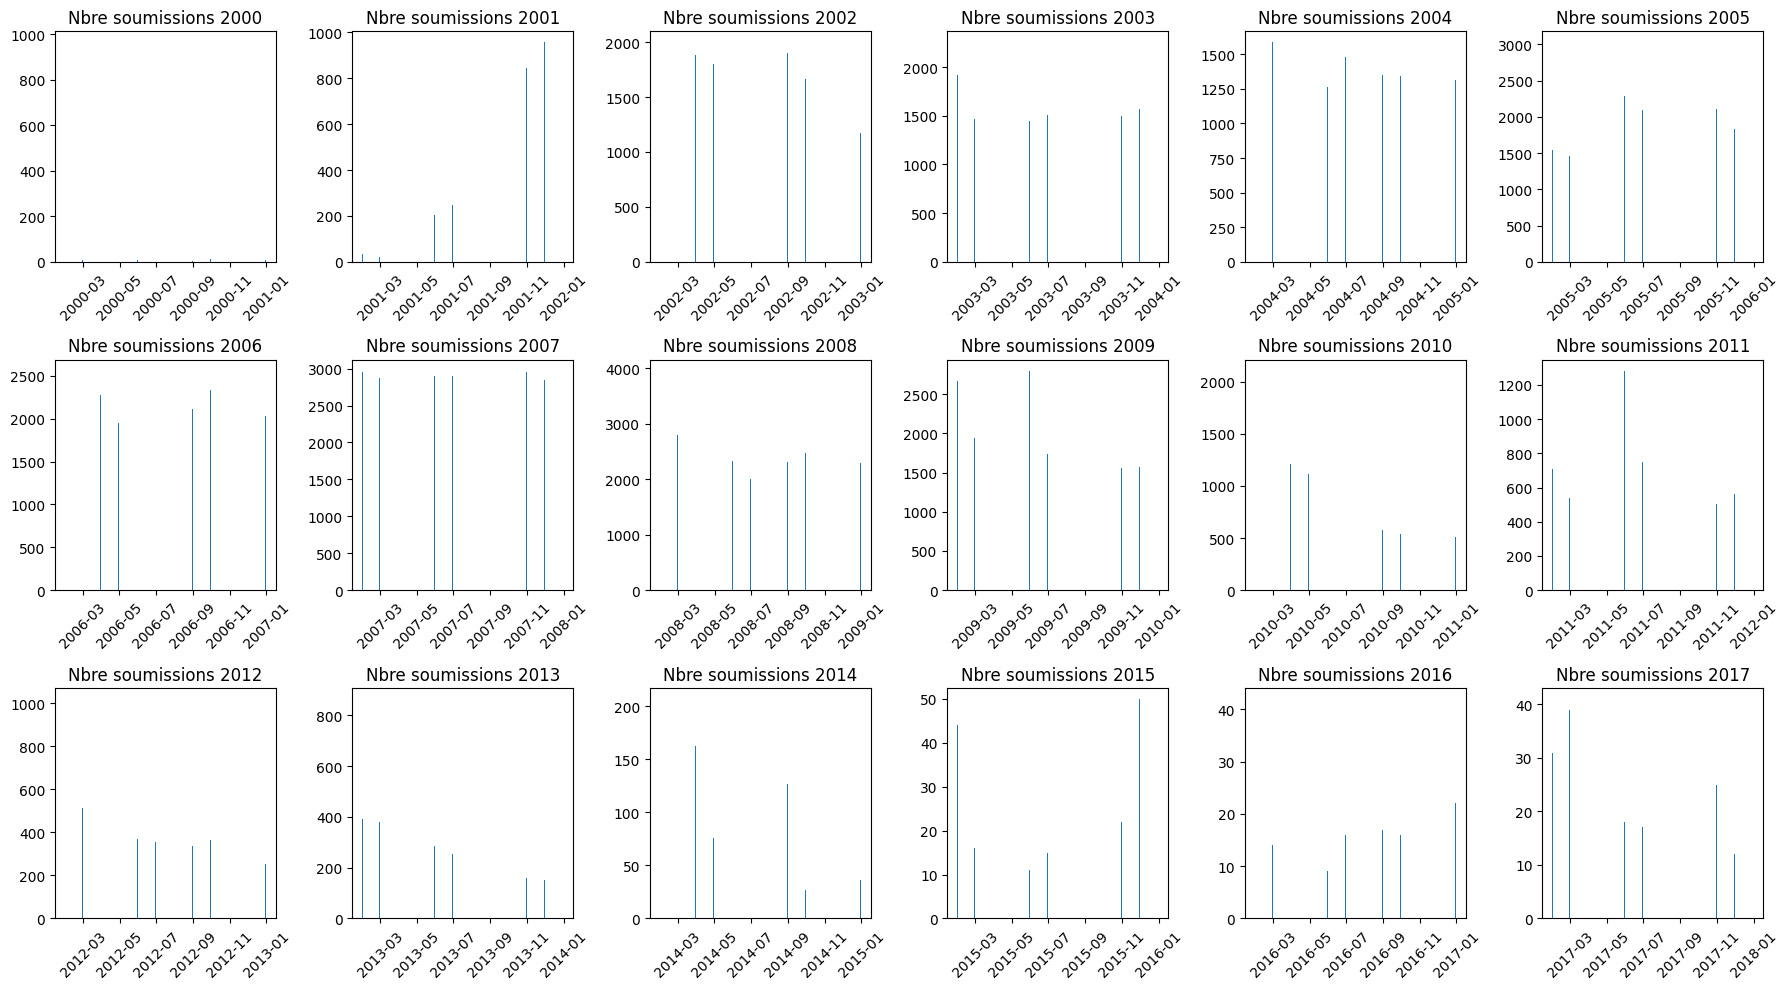

In [10]:
Dico_submitted_date={}
Dico_submitted_count={}

def annual_recipes(*args):
    submitted_counts = df_RAW_recipes[df_RAW_recipes['submitted'].dt.year==args].submitted.value_counts()
    submitted_counts = submitted_counts.sort_index()
    
    monthly_counts=df_RAW_recipes[df_RAW_recipes['submitted'].dt.year==args].resample('M',on='submitted').size()
    monthly_counts = monthly_counts.sort_index()

    
    return(monthly_counts.index, monthly_counts.values,submitted_counts)

def plot(annee,index,values):
    plt.figure(figsize=(10, 6))
    plt.bar(index, values)

    plt.xlabel('Dates')
    plt.ylabel('Nombre de soumissions')
    plt.title(f'Nombre de soumissions par date {annee}')
    plt.xticks(rotation=45)
    plt.show()
    
fig, axes = plt.subplots(3, 6, figsize=(18, 10))
                                                                       
for k,i in enumerate(range(2000,2018)):
    row = k//6
    col= k%6
    Dico_submitted_date[i]=annual_recipes(i)[0]
    Dico_submitted_count[i]=annual_recipes(i)[1]
    axes[row,col].bar(Dico_submitted_date[i], Dico_submitted_count[i])
    axes[row,col].set_title(f'Nbre soumissions {i}')
    axes[row,col].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()

In [11]:
df_monthly_recipes_count=pd.DataFrame(Dico_submitted_count).T
df_monthly_recipes_count.columns=range(1, 13, 1)
df_monthly_recipes_count.describe()

,1,2,3,4,5,6,7,8,9,10,11,12
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1213.000000,1029.277778,1141.555556,1120.166667,1203.944444,1039.444444,1030.111111,1024.555556,1011.055556,1037.388889,1013.888889,879.722222
std,1190.732893,969.148189,1003.347704,1082.343060,1093.704900,962.317620,898.469999,992.639217,993.539038,1000.125706,958.209230,849.468055
min,5.000000,8.000000,8.000000,2.000000,7.000000,1.000000,5.000000,5.000000,13.000000,8.000000,12.000000,6.000000
25%,84.750000,69.000000,211.250000,86.000000,84.250000,108.250000,153.500000,172.250000,73.500000,68.000000,75.500000,69.750000
50%,1033.000000,898.000000,1087.000000,861.000000,1275.500000,953.000000,942.500000,553.000000,541.500000,732.000000,799.000000,685.000000
75%,1829.750000,1563.250000,1805.000000,1918.750000,2238.750000,1726.000000,1681.750000,1868.250000,1738.500000,1889.500000,1572.250000,1341.750000
max,3958.000000,2870.000000,2947.000000,3027.000000,2899.000000,2907.000000,2589.000000,2973.000000,2909.000000,2951.000000,2851.000000,2586.000000


# Etude sur les ingredients/saisonnalité 

In [24]:
# On récupère les recettes tokenisées 
df_RAW_recipes_merged=df_RAW_recipes.copy()
df_RAW_recipes_merged=df_RAW_recipes_merged.merge(df_pp_recipes,how='inner',on='id')

In [25]:
df_RAW_recipes_merged[df_RAW_recipes_merged.isna().any(axis=1)] # Verification présence de NaN

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
3,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4,28162,"[40480, 7304, 246, 850, 5940, 3033, 40481]","[[5940], [15000, 755, 4914], [4787, 7304, 7524...","[40480, 40482, 23667, 16126, 500, 37588, 40478...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[4717, 7474, 2946, 150]"
5,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6,90348,"[40480, 27593, 282, 755, 4914, 7056, 40481]","[[5317, 7478, 4530, 9021], [5317, 17881], [150...","[40480, 40482, 18777, 9021, 666, 246, 291, 260...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[1397, 1447, 7474, 342, 6858, 7702]"
59,pizza stuffed potato,52443,25,1533,2003-01-28,"['30-minutes-or-less', 'time-to-make', 'course...","[183.3, 12.0, 9.0, 15.0, 21.0, 23.0, 6.0]",8,"['preheat oven to 450 degrees', 'cut potato in...",NaN,"['baking potato', 'mozzarella cheese', 'tomato...",7,56827,"[40480, 6856, 6003, 13995, 40481]","[[15473, 13995], [593, 1648, 37151, 6821], [16...","[40480, 40482, 729, 2525, 10906, 485, 44, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[331, 4836, 7233, 5191, 5108, 3217, 5180]"
77,the woiks dilly burgers,34930,32,23302,2002-07-24,"['bacon', '60-minutes-or-less', 'time-to-make'...","[449.2, 50.0, 16.0, 19.0, 58.0, 67.0, 2.0]",8,"['in a bowl , mix together the ground beef , m...",NaN,"[""mccormick's montreal brand steak seasoning"",...",9,104831,"[40480, 481, 1080, 11, 742, 33691, 18366, 40481]","[[35768, 10394, 535, 35545, 6728, 11892, 29471...","[40480, 40482, 500, 246, 5024, 240, 7087, 1281...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[4821, 2159, 4053, 3543, 298, 112, 4308, 7213,..."
95,20 000 prize winning chili con carne,190,175,115621,1999-08-06,"['weeknight', 'time-to-make', 'course', 'main-...","[558.1, 25.0, 55.0, 41.0, 111.0, 25.0, 12.0]",17,"['in large saucepan or dutch oven , brown half...",NaN,"['lean chuck', 'lean pork', 'onion', 'garlic c...",18,97690,"[40480, 7379, 7397, 9462, 8457, 22942, 8537, 8...","[[4334, 7961], [4334, 12395], [21453], [15022,...","[40480, 40482, 500, 1719, 4835, 39587, 522, 19...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[4187, 4206, 5010, 3203, 821, 7233, 7655, 1329..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178071,zucchini squash rice casserole,41454,71,1533,2002-09-30,"['weeknight', 'time-to-make', 'course', 'main-...","[189.0, 6.0, 26.0, 22.0, 22.0, 9.0, 8.0]",11,"['preheat oven to 350 degrees', 'combine first...",NaN,"['zucchini', 'onion', 'reduced-sodium fat-free...",12,101282,"[40480, 12519, 25, 573, 10825, 23841, 6878, 26...","[[12519, 25, 573, 10825], [21453], [11197, 260...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",0,"[8021, 5010, 1257, 1746, 6654, 1168, 2855, 393..."
178122,zucchini with onions and tomatoes,33602,50,23302,2002-07-08,"['60-minutes-or-less', 'time-to-make', 'course...","[84.4, 5.0, 28.0, 1.0, 6.0, 9.0, 4.0]",5,['melt the butter in a large saucepan and cook...,NaN,"['unsalted butter', 'onion', 'garlic', 'no-sal...",6,51406,"[40480, 12519, 25, 573, 10825, 556, 19414, 488...","[[563, 31331, 8780], [21453], [15022], [664, 2...","[40480, 40482, 9423, 481, 8780, 500, 246, 1719...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7367, 5010, 3184, 2131, 8021, 2757]"
178156,zucchini red pepper leek frittata,41429,65,1533,2002-09-30,"['week

In [ ]:
# Convertis les ingrédients en liste 

df_RAW_recipes_merged.ingredients =  df_RAW_recipes_merged.ingredients.apply(lambda x : ast.literal_eval(x) )

In [129]:
# On compte regarde les occurences de chaque ingrédients par mois
# Exemple janvier 2015

X_2015_01=df_RAW_recipes_merged[(df_RAW_recipes_merged['submitted'].dt.year==2015) & (df_RAW_recipes_merged['submitted'].dt.month==1)].ingredients                                                                      

A=[]
for index in range(X_2015_01.shape[0]):
    A+=X_2015_01.iloc[index]

print(len(A),X_2015_01.shape[0])
Counter(A)

134 13


Counter({'onion': 4,
         'water': 4,
         'garlic cloves': 4,
         'salt': 3,
         'olive oil': 3,
         'diced tomatoes': 3,
         'fresh ground black pepper': 3,
         'sea salt': 3,
         'shredded cheddar cheese': 2,
         'vegetable oil': 2,
         'lime zest': 2,
         'coconut oil': 2,
         'garlic powder': 2,
         'red pepper flakes': 2,
         'fresh italian parsley': 2,
         'kosher salt': 2,
         'oil': 2,
         'chicken stock': 2,
         'tomato sauce': 2,
         'ground black pepper': 2,
         'broccoli floret': 1,
         'russet potato': 1,
         'panko breadcrumbs': 1,
         'eggs': 1,
         'black pepper': 1,
         'cayenne pepper': 1,
         'flour': 1,
         'canola oil': 1,
         'salmon fillets': 1,
         'garlic pepper seasoning': 1,
         'honey': 1,
         'fresh lime juice': 1,
         'low sodium soy sauce': 1,
         'fresh cilantro': 1,
         'quinoa': 1,
    

In [137]:
#On refait l'exercice pour toutes les années sur un mois donné
Dico_month_ingredients = {}
for year in range(2000,2018):
    A = []
    X = df_RAW_recipes_merged[(df_RAW_recipes_merged['submitted'].dt.year==year) & (df_RAW_recipes_merged['submitted'].dt.month==1)].ingredients
    for index in range(X.shape[0]):
        A += X.iloc[index]
    Dico_month_ingredients['X_' + str(year)] = Counter(A)                                                                    
    Dico_month_ingredients['X_' + str(year)]['nbre_recipes'] = X.shape[0]
    Dico_month_ingredients['X_' + str(year)]['nbre_ingredients'] = len(A)
    

In [142]:
Dico_month_ingredients['X_2000']

Counter({'nbre_ingredients': 36,
         'nbre_recipes': 5,
         'butter': 3,
         'salt': 2,
         'beer': 2,
         'white bread': 1,
         'smooth peanut butter': 1,
         'banana': 1,
         'cooking oil': 1,
         'yellow onions': 1,
         'leek': 1,
         'corn': 1,
         'red potatoes': 1,
         'jalapeno pepper': 1,
         'cumin': 1,
         'chili powder': 1,
         'creamed corn': 1,
         'milk': 1,
         'fresh thyme': 1,
         'mustard': 1,
         'pepper': 1,
         'velveeta american cheese spread': 1,
         'italian bread': 1,
         'macaroni and cheese mix': 1,
         'cream of mushroom soup': 1,
         'tuna fish': 1,
         'lemon juice': 1,
         'flour': 1,
         'baking powder': 1,
         'sugar': 1,
         'garlic powder': 1,
         'egg': 1,
         'oil': 1,
         'cheddar cheese': 1})

In [156]:
January_Ingredients=pd.DataFrame(Dico_month_ingredients).T
January_Ingredients=January_Ingredients.fillna(0)
January_Ingredients

,white bread,smooth peanut butter,banana,butter,cooking oil,yellow onions,leek,corn,red potatoes,jalapeno pepper,...,truvia,horseradish mayonnaise,anjou pear,poppy seed filling,lean ground chicken,frozen strawberry daiquiri concentrate,spinach linguine,whole chicken breast,young roasting chickens,coconut aminos
X_2000,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2001,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2002,3.0,1.0,14.0,304.0,17.0,3.0,2.0,8.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2003,3.0,1.0,11.0,409.0,14.0,2.0,8.0,9.0,9.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2004,10.0,3.0,5.0,290.0,8.0,1.0,2.0,3.0,8.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2005,6.0,5.0,10.0,317.0,8.0,10.0,3.0,4.0,10.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2006,8.0,1.0,23.0,430.0,11.0,9.0,6.0,11.0,8.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2007,11.0,5.0,32.0,559.0,20.0,3.0,4.0,17.0,18.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2008,12.0,1.0,32.0,739.0,15.0,2.0,4.0,27.0,22.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X_2009,11.0,2.0,19.0,480.0,11.0,13.0,9.0,19.0,6.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
January_Ingredients.nbre_ingredients

X_2000       36.0
X_2001      192.0
X_2002     9834.0
X_2003    14411.0
X_2004    11275.0
X_2005    11090.0
X_2006    16609.0
X_2007    21549.0
X_2008    27894.0
X_2009    18572.0
X_2010    10397.0
X_2011     4494.0
X_2012     3721.0
X_2013     2368.0
X_2014     1117.0
X_2015      134.0
X_2016       35.0
X_2017       74.0
Name: nbre_ingredients, dtype: float64